In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer


%matplotlib inline
sns.set_theme(style="darkgrid")
# sns.set_style('white')

In [2]:
customers = pd.read_csv("archive/Churn_Modelling.csv")

In [3]:
customers.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The column __NumOfProducts__ means how many products he or she has in a bank. For example, he may have a credit card, debit card, and mortgage loan. That will be 3 products.



In [68]:
new_customers_data = customers.iloc[:, 3:]

In [6]:
new_customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
new_customers_data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
new_customers_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
pd.crosstab(index=[new_customers_data.Geography, new_customers_data.Exited], columns=new_customers_data.Gender, margins=True)

Gender            Female  Male    All
Geography Exited                     
France    0         1801  2403   4204
          1          460   350    810
Germany   0          745   950   1695
          1          448   366    814
Spain     0          858  1206   2064
          1          231   182    413
All                 4543  5457  10000

In [10]:
pd.crosstab(index=new_customers_data.Exited, columns=new_customers_data.NumOfProducts, margins=True)

NumOfProducts,1,2,3,4,All
Exited,,,,,
0,3675,4242,46,0,7963
1,1409,348,220,60,2037
All,5084,4590,266,60,10000


In [11]:
new_customers_data.groupby('Exited')['Tenure'].mean()

Exited
0    5.033279
1    4.932744
Name: Tenure, dtype: float64

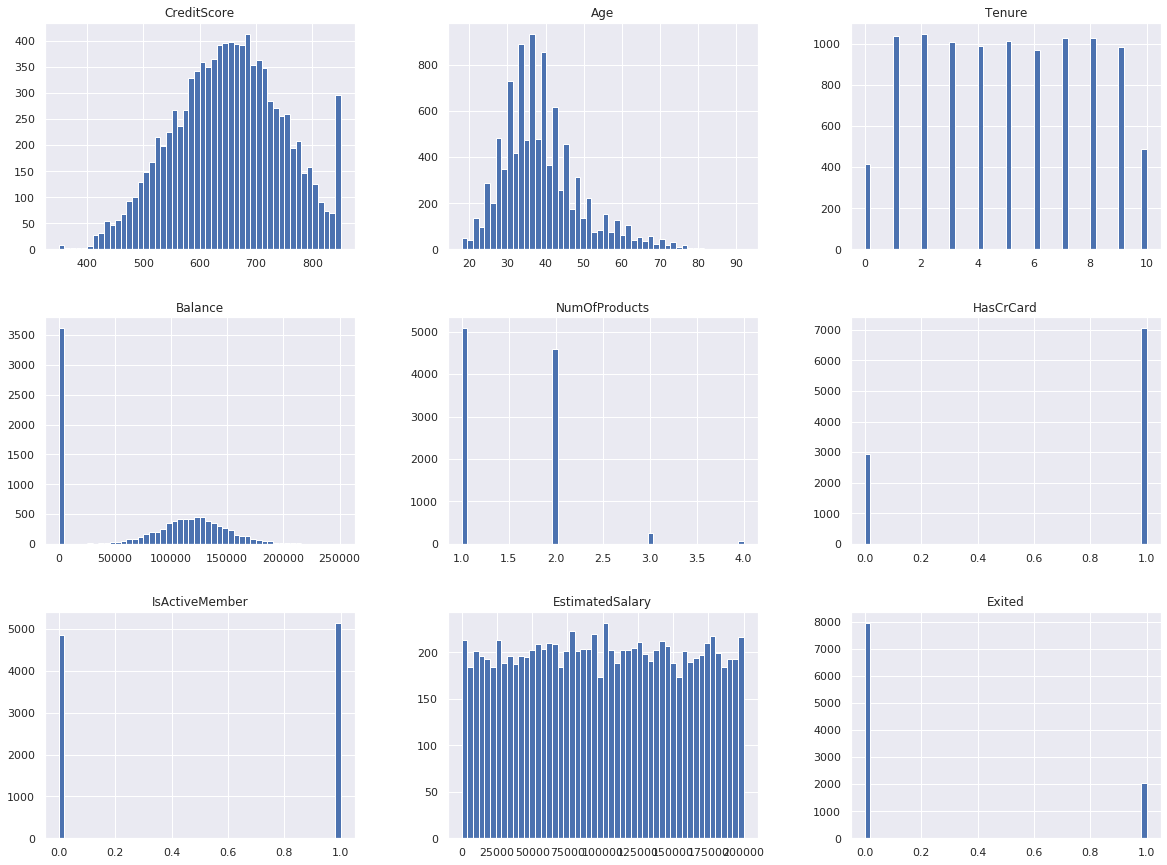

In [12]:
new_customers_data.hist(bins=50, figsize=(20,15))
plt.show()

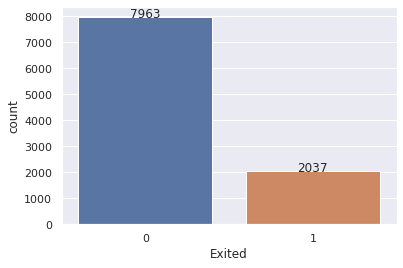

In [13]:
ax = sns.countplot(x="Exited", data=new_customers_data)

for p in ax.patches:
    h = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.0, h + 0.4, h, ha="center")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

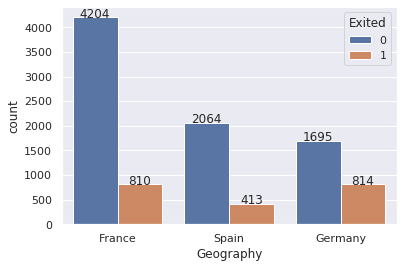

In [14]:
ax = sns.countplot(x="Geography", hue="Exited", data=new_customers_data)

for p in ax.patches:
    h = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.0, h + 0.4, h, ha="center")

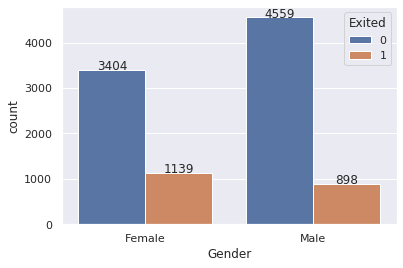

In [15]:
ax = sns.countplot(x="Gender", hue="Exited", data=new_customers_data)
for p in ax.patches:
    h = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.0, h + 0.4, h, ha="center")

In [16]:
pd.crosstab(new_customers_data.HasCrCard, new_customers_data.Exited, margins=True)

Exited,0,1,All
HasCrCard,,,
0,2332,613,2945
1,5631,1424,7055
All,7963,2037,10000


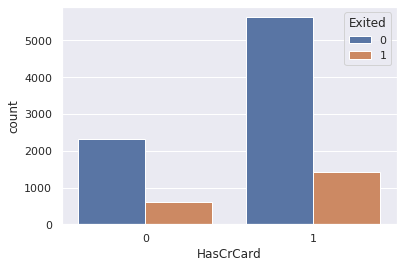

In [17]:
sns.countplot(x="HasCrCard", hue="Exited",  data=new_customers_data)

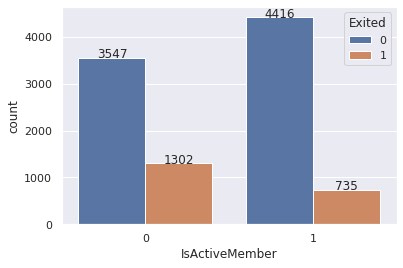

In [18]:
act = sns.countplot(x="IsActiveMember", hue="Exited",  data=new_customers_data)
for p in act.patches:
    h = p.get_height()
    act.text(p.get_x() + p.get_width()/2.0, h + 0.4, h, ha="center")

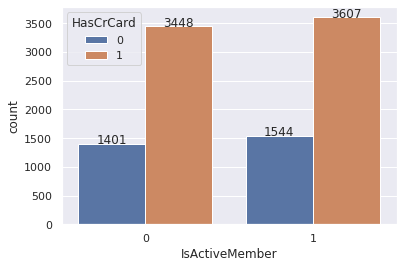

In [19]:
actHas = sns.countplot(x="IsActiveMember", hue="HasCrCard",  data=new_customers_data)
for p in actHas.patches:
    h = p.get_height()
    actHas.text(p.get_x() + p.get_width()/2.0, h + 0.4, h, ha="center")

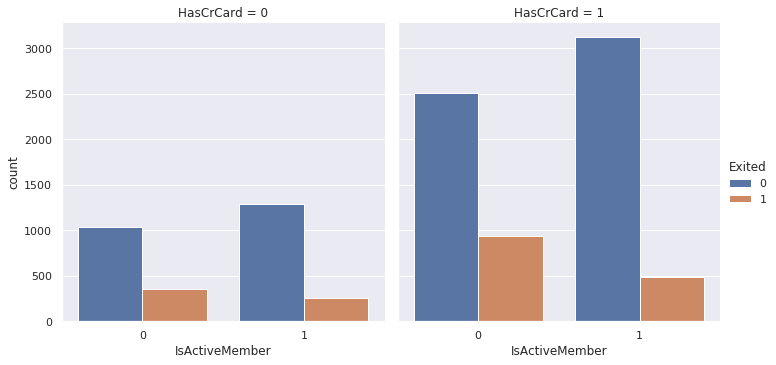

In [20]:
sns.catplot(x="IsActiveMember", hue="Exited", col='HasCrCard', data=new_customers_data, kind='count')

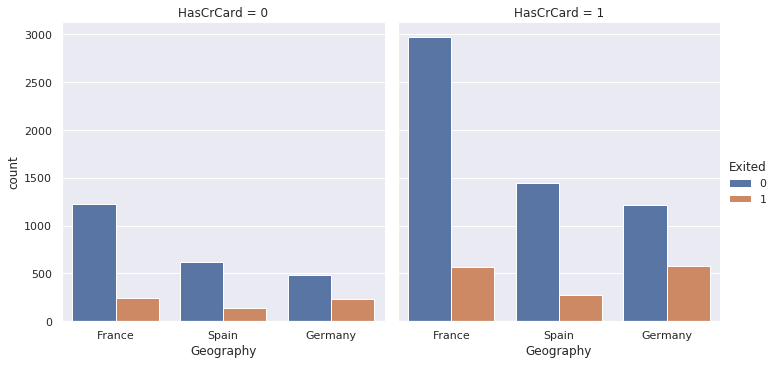

In [21]:
sns.catplot(x='Geography', hue='Exited', col='HasCrCard', data=new_customers_data, kind='count')

In [22]:
# people exiting are getting high salary on average seems.

new_customers_data.groupby("Exited")['EstimatedSalary'].mean()

Exited
0     99738.391772
1    101465.677531
Name: EstimatedSalary, dtype: float64

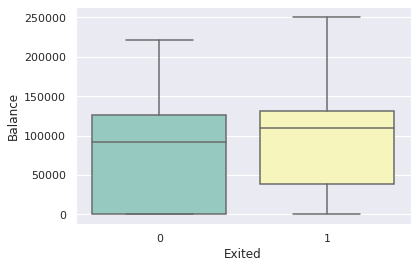

In [23]:
sns.boxplot(x='Exited', y='Balance', data=new_customers_data, palette="Set3")

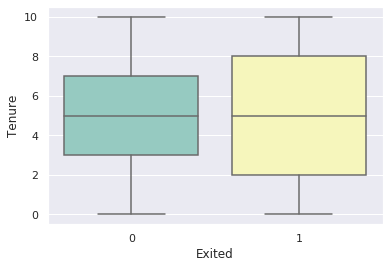

In [24]:
sns.boxplot(x='Exited', y='Tenure', data=new_customers_data, palette="Set3")

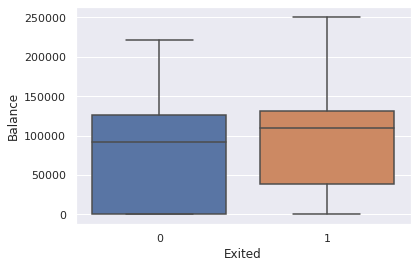

In [25]:
sns.boxplot(x='Exited', y='Balance', data=new_customers_data)

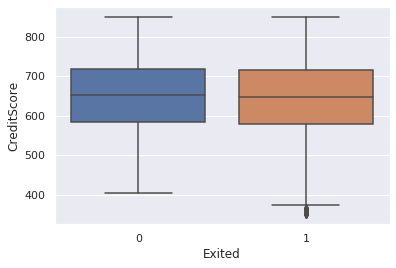

In [26]:
sns.boxplot(x='Exited', y='CreditScore', data=new_customers_data)

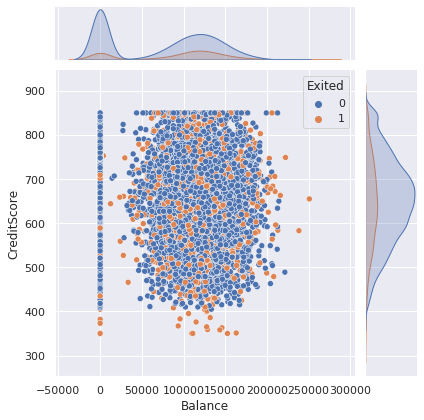

In [27]:
sns.jointplot(x='Balance',y='CreditScore',hue='Exited', data=new_customers_data, kind='scatter')

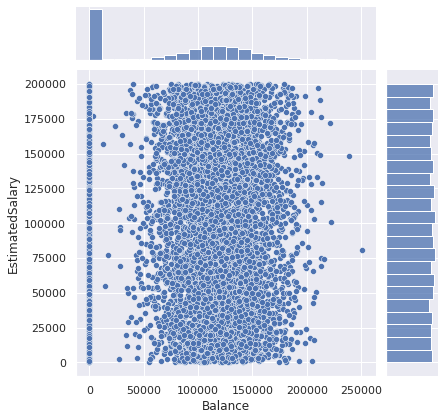

In [28]:
sns.jointplot(x='Balance',y='EstimatedSalary', data=new_customers_data, kind='scatter')

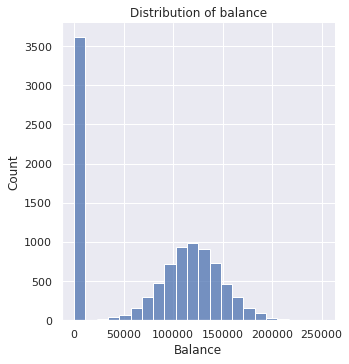

In [29]:
sns.displot(x='Balance', data=new_customers_data)
plt.title('Distribution of balance');

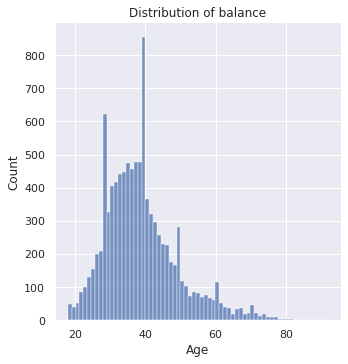

In [30]:
sns.displot(x='Age', data=new_customers_data)
plt.title('Distribution of balance');

In [31]:
new_customers_data.groupby("Exited")['Age'].mean()

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

In [32]:
new_customers_data.groupby('Exited')['Tenure'].mean()

Exited
0    5.033279
1    4.932744
Name: Tenure, dtype: float64

In [33]:
# sns.pairplot(new_customers_data, palette='coolwarm')

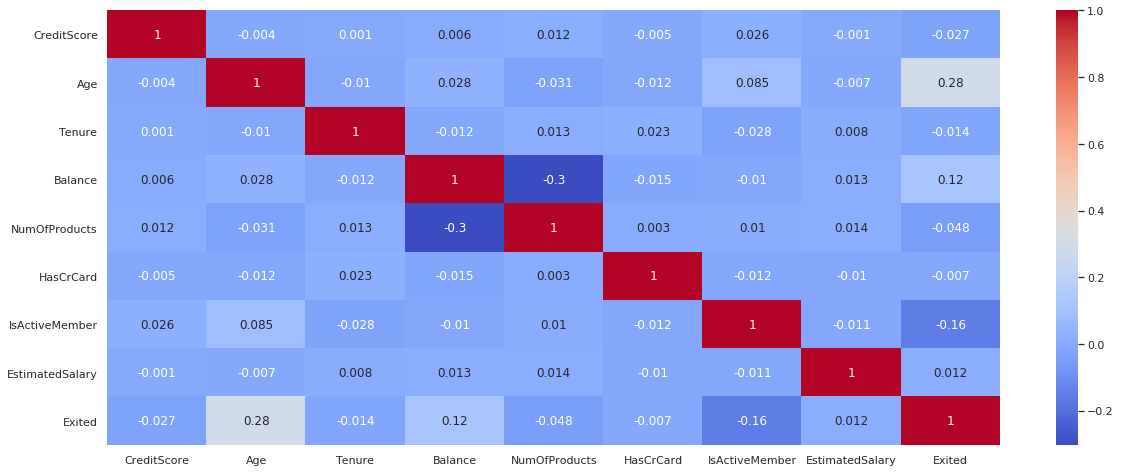

In [34]:
plt.figure(figsize=(20,8))
sns.heatmap(round(new_customers_data.corr(),3),cmap='coolwarm',annot=True)
# new_customers_data.corr()

In [35]:
train = new_customers_data.sample(frac=0.8, random_state=0)
test = new_customers_data.drop(train.index)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [36]:
y_train, y_test = train.Exited, test.Exited
x_train, x_test = train.drop("Exited", axis=1), test.drop("Exited", axis=1)

In [37]:
# class ColumnTransformer(BaseEstimator, TransformerMixin):
    
#     def __init__(self, data):
#         self.data = data
#         self.features_obj = [feat for feat in x_train.columns if x_train[feat].dtypes == "object"]
#         self.features_num = [feat for feat in x_train.columns if x_train[feat].dtypes != "object"]
#     def fit(X, y=None):
#         return self
    
#     def tranform(self, X):
#         self.data[self.features_obj] = self.data[self.features_obj].apply
        
        
    

In [47]:
classifiers = {
    "lr": LogisticRegression(),
    "rf": RandomForestClassifier(),
    "tree": DecisionTreeClassifier(),
    "xtra": ExtraTreeClassifier(),
    "gdb": GradientBoostingClassifier(),
    "ada": AdaBoostClassifier()   
}

In [39]:
features_obj = [feat for feat in x_train.columns if x_train[feat].dtypes == "object"]
transformer = ColumnTransformer(remainder='passthrough', transformers=[("onehot", OneHotEncoder(), features_obj)])

In [40]:
features_obj

['Geography', 'Gender']

In [41]:
def best_classifier(scores, cv_scores, cv=False):
    best_model = ''
    best_score = 0

    if cv:
        if len(cv_scores) > 0:
            for model in cv_scores:
                mean_score = np.mean(cv_scores[model])
                
                print("-"*50)
                print("Model name:", model)
                print('Scores from each Iteration: ', cv_scores[model])
                print('Average K-Fold Test Score :' , mean_score)
                
                if mean_score > best_score:
                    best_score = mean_score
                    best_model = model
            print()
            print("The best model is {} with score:{:.2f}".format(best_model, best_score))
            
    else:
        best_model = ''
        best_score = 0

        for model in scores:
            mean_score = scores[model]
            if mean_score > best_score:
                best_score = mean_score
                best_model = model
            print("-"*50)
            print("Model name:", model)
            print('Model Score :' , mean_score)

        print()
        print("The best model is {} with score:{:.2f}".format(best_model, best_score))

In [42]:
def train_classifiers(data, labels, X_test, Y_test, cv=False, transformers = None,**kwargs):
    
    if transformers is None:
        transformers = transformer
    
    scores = {}        
    cv_scores = {f'{kwargs[model].__class__.__name__}':[] for model in kwargs.keys()}
    cv_test_scores = {f'{kwargs[model].__class__.__name__}':[] for model in kwargs.keys()}
    
    if cv:
        
        skf = StratifiedKFold(n_splits=5)
        
        for model_key in kwargs.keys():
            model = kwargs[model_key]
            estimator = None
                                    
            for train_idx, test_idx in skf.split(data, labels): 
                x_train, x_test, y_train, y_test = data.iloc[train_idx, :], data.iloc[test_idx, :], labels[train_idx], labels[test_idx]
                estimator = Pipeline([("transformer", transformers), (f'{model.__class__.__name__}', model)])
                estimator.fit(x_train,y_train)
                test_scores = estimator.score(x_test,y_test)
                cv_scores[f'{model.__class__.__name__}'].append(test_scores)
                
            testscores = estimator.score(X_test, Y_test)
            cv_test_scores[f'{model.__class__.__name__}'].append(testscores) 
    
        print("On unseen data, test score :", cv_test_scores)
        print(">>>>>>>>>>>>>>> <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
    else:
        for model_key in kwargs.keys():
            model = kwargs[model_key]
            pipe = None
            pipe = Pipeline([("transformer", transformers), (f'{model.__class__.__name__}', model)])
            pipe.fit(data, labels)
            
            if len(kwargs.keys()) == 1:
                print("The model training score: ", pipe.score(data, labels))
            test_score = pipe.score(X_test, Y_test)
            scores[f'{model.__class__.__name__}'] = test_score
            
    best_classifier(scores, cv_scores=cv_scores, cv=cv)    
        
        

In [43]:
train_classifiers(data=x_train, labels=y_train, X_test=x_test, Y_test=y_test, cv=False,**classifiers)

--------------------------------------------------
Model name: LogisticRegression
Model Score : 0.7965
--------------------------------------------------
Model name: RandomForestClassifier
Model Score : 0.859
--------------------------------------------------
Model name: DecisionTreeClassifier
Model Score : 0.785
--------------------------------------------------
Model name: ExtraTreeClassifier
Model Score : 0.7735
--------------------------------------------------
Model name: GradientBoostingClassifier
Model Score : 0.863
--------------------------------------------------
Model name: AdaBoostClassifier
Model Score : 0.8555

The best model is GradientBoostingClassifier with score:0.86


In [44]:
train_classifiers(data=x_train, labels=y_train, X_test=x_test, Y_test=y_test, cv=True,**classifiers)

On unseen data, test score : {'LogisticRegression': [0.796], 'RandomForestClassifier': [0.8555], 'DecisionTreeClassifier': [0.8125], 'ExtraTreeClassifier': [0.7705], 'GradientBoostingClassifier': [0.8605], 'AdaBoostClassifier': [0.855]}
>>>>>>>>>>>>>>> <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
--------------------------------------------------
Model name: LogisticRegression
Scores from each Iteration:  [0.795625, 0.778125, 0.78875, 0.795, 0.788125]
Average K-Fold Test Score : 0.789125
--------------------------------------------------
Model name: RandomForestClassifier
Scores from each Iteration:  [0.86125, 0.874375, 0.8625, 0.850625, 0.858125]
Average K-Fold Test Score : 0.861375
--------------------------------------------------
Model name: DecisionTreeClassifier
Scores from each Iteration:  [0.79125, 0.801875, 0.7975, 0.794375, 0.795625]
Average K-Fold Test Score : 0.796125
--------------------------------------------------
Model name: ExtraTreeClassifier
Scores from each Iteration:  [0.76, 0.

__We can see that the top 3 classifiers are GradientBoostingClassifier, RandomForestClassifier and AdaBoostClassifier respectively.__ 

### Grid search for searching better hyperparameters

In [48]:
%%time

params_lr = {
    "lr__C": [0.5*i for i in range(10)]
}

model = classifiers['lr']

pipe = Pipeline([("transformer", transformer), ('lr', model)])
grid_lr = GridSearchCV(pipe, param_grid=params_lr, cv=StratifiedKFold(), n_jobs=4, verbose=4)
grid_lr.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  43 out of  50 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.6s finished


CPU times: user 171 ms, sys: 8.96 ms, total: 180 ms
Wall time: 657 ms


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         ['Geography',
                                                                          'Gender'])])),
                                       ('lr', LogisticRegression())]),
             n_jobs=4,
             param_grid={'lr__C': [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0,
                                   4.5]},
             verbose=4)

In [49]:
print("The score", grid_lr.score(x_test, y_test), 'Hyperparameters', grid_lr.best_params_)

The score 0.7965 Hyperparameters {'lr__C': 0.5}


In [50]:
%%time

params_gdb = {
    "gdb__n_estimators": [100*i+50 for i in range(6)],
    "gdb__max_depth": [i for i in range(4)],
    "gdb__learning_rate": [0.05, 0.075,0.1, 0.25,0.5,0.75,1.0],
}


pipegdb = Pipeline([("transformer", transformer), ('gdb', classifiers['gdb'])])
grid_gdb = GridSearchCV(pipegdb, param_grid=params_gdb, cv=StratifiedKFold(), n_jobs=4, verbose=4)
grid_gdb.fit(x_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 179 tasks      | elapsed:   56.8s
[Parallel(n_jobs=4)]: Done 341 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 576 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done 840 out of 840 | elapsed:  6.0min finished


CPU times: user 5.99 s, sys: 213 ms, total: 6.2 s
Wall time: 6min 2s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         ['Geography',
                                                                          'Gender'])])),
                                       ('gdb', GradientBoostingClassifier())]),
             n_jobs=4,
             param_grid={'gdb__learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5,
                                                0.75, 1.0],
                         'gdb__max_depth': [0, 1, 2, 3],
                         'gdb__n_estimators': [50, 150, 250, 350, 450, 550]},
             verbose=4)

In [51]:
print("The score", grid_gdb.score(x_test, y_test))

The score 0.8645


In [52]:
print('Hyperparameters:', grid_gdb.best_params_)
print('Training R^2 {}'.format(grid_gdb.score(x_train, y_train)))
print('CV R^2 {}'.format(grid_gdb.best_score_))
print('Testing R^2 {}'.format(grid_gdb.score(x_test, y_test)))

Hyperparameters: {'gdb__learning_rate': 0.05, 'gdb__max_depth': 3, 'gdb__n_estimators': 350}
Training R^2 0.882375
CV R^2 0.865375
Testing R^2 0.8645


In [49]:
0.882375-0.8651249999999999

0.0172500000000001

In [53]:
%%time

params_rf = {
    "rf__n_estimators": [100*i+50 for i in range(6)],
    "rf__max_depth": [i for i in range(10)],
    "rf__min_samples_split": [i for i in range(4)],
}

piperf = Pipeline([("transformer", transformer), ('rf', classifiers['rf'])])
grid_rf = GridSearchCV(piperf, param_grid=params_rf, cv=StratifiedKFold(), n_jobs=4, verbose=4)
grid_rf.fit(x_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 260 tasks      | elapsed:   13.5s
[Parallel(n_jobs=4)]: Done 389 tasks      | elapsed:   30.2s
[Parallel(n_jobs=4)]: Done 560 tasks      | elapsed:   54.2s
[Parallel(n_jobs=4)]: Done 781 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 1050 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done 1200 out of 1200 | elapsed:  3.4min finished


CPU times: user 4.47 s, sys: 352 ms, total: 4.82 s
Wall time: 3min 25s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         ['Geography',
                                                                          'Gender'])])),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=4,
             param_grid={'rf__max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'rf__min_samples_split': [0, 1, 2, 3],
                         'rf__n_estimators': [50, 150, 250, 350, 450, 550]},
             verbose=4)

In [54]:
print('Hyperparameters:', grid_rf.best_params_)
print('Training R^2 {}'.format(grid_rf.score(x_train, y_train)))
print('CV R^2 {}'.format(grid_rf.best_score_))
print('Testing R^2 {}'.format(grid_rf.score(x_test, y_test)))

Hyperparameters: {'rf__max_depth': 9, 'rf__min_samples_split': 2, 'rf__n_estimators': 50}
Training R^2 0.887125
CV R^2 0.862125
Testing R^2 0.86


In [52]:
0.89025 - 0.8625

0.02774999999999994

In [55]:
%%time

params_ada = {
    "ada__n_estimators": [100*i+50 for i in range(6)],
    "ada__random_state": [0]
}

pipeada = Pipeline([("transformer", transformer), ('ada', classifiers['ada'])])
grid_ada = GridSearchCV(pipeada, param_grid=params_ada, cv=StratifiedKFold(), n_jobs=4, verbose=4)
grid_ada.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   14.2s finished


CPU times: user 350 ms, sys: 11.4 ms, total: 361 ms
Wall time: 14.5 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         ['Geography',
                                                                          'Gender'])])),
                                       ('ada', AdaBoostClassifier())]),
             n_jobs=4,
             param_grid={'ada__n_estimators': [50, 150, 250, 350, 450, 550],
                         'ada__random_state': [0]},
             verbose=4)

In [56]:
print('Hyperparameters:', grid_ada.best_params_)
print('Training R^2 {}'.format(grid_ada.score(x_train, y_train)))
print('CV R^2 {}'.format(grid_ada.best_score_))
print('Testing R^2 {}'.format(grid_ada.score(x_test, y_test)))

Hyperparameters: {'ada__n_estimators': 50, 'ada__random_state': 0}
Training R^2 0.859125
CV R^2 0.8540000000000001
Testing R^2 0.8555


In [55]:
0.859125-0.8540000000000001

0.005124999999999935

### FEATURE ENGINEERING

We start with binalizing age feature and scaling numeric features.

In [57]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import VotingClassifier

In [126]:
classifiers = {
    "lr": LogisticRegression(),
    "rf": RandomForestClassifier(),
    "tree": DecisionTreeClassifier(),
    "xtra": ExtraTreeClassifier(),
    "gdb": GradientBoostingClassifier(),
    "ada": AdaBoostClassifier()   
}

In [127]:
new_keys_gbc = {key.split("__")[-1]:val for key, val in grid_gdb.best_params_.items()}
gbc = classifiers['gdb']
gbc.set_params(**new_keys_gbc)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=350)

In [128]:
new_keys_ada = {key.split("__")[-1]:val for key, val in grid_ada.best_params_.items()}
adabst = classifiers['ada']
adabst.set_params(**new_keys_ada)

AdaBoostClassifier(random_state=0)

In [129]:
new_keys_rf = {key.split("__")[-1]:val for key, val in grid_rf.best_params_.items()}
rfclass = classifiers['rf']
rfclass.set_params(**new_keys_rf)

RandomForestClassifier(max_depth=9, n_estimators=50)

###### **TRAIN WITH BEST HYPER-PARAMETERS**

In [130]:
best_classifiers = {
    "rf": rfclass,
    "gdb": gbc,
    "ada": adabst  
}

In [81]:
train_classifiers(data=x_train, labels=y_train, X_test=x_test, Y_test=y_test, cv=True,**best_classifiers)

On unseen, test score : {'RandomForestClassifier': [0.8575], 'GradientBoostingClassifier': [0.8605], 'AdaBoostClassifier': [0.855]}
>>>>>>>>>>>>>>> <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
--------------------------------------------------
Model name: RandomForestClassifier
Scores from each Iteration:  [0.868125, 0.868125, 0.85875, 0.85625, 0.859375]
Average K-Fold Test Score : 0.862125
--------------------------------------------------
Model name: GradientBoostingClassifier
Scores from each Iteration:  [0.8675, 0.876875, 0.86625, 0.85625, 0.860625]
Average K-Fold Test Score : 0.8654999999999999
--------------------------------------------------
Model name: AdaBoostClassifier
Scores from each Iteration:  [0.8575, 0.858125, 0.86125, 0.8425, 0.850625]
Average K-Fold Test Score : 0.8540000000000001

The best model is GradientBoostingClassifier with score:0.87


In [87]:
numeric_features = [feat for feat in x_train.columns if x_train[feat].dtypes != "object"]
NumericTransformer = ColumnTransformer(remainder='drop', transformers=[("std", StandardScaler(), numeric_features)])
Categorytransformer = ColumnTransformer(remainder='drop', transformers=[("onehot", OneHotEncoder(), features_obj)])

FeaturesUnion = FeatureUnion([("Int transformer", NumericTransformer), ("object transformer", Categorytransformer)])

In [93]:
train_classifiers(data=x_train, labels=y_train, X_test=x_test, Y_test=y_test, cv=True, transformers=FeaturesUnion,**best_classifiers)

On unseen, test score : {'RandomForestClassifier': [0.855], 'GradientBoostingClassifier': [0.8605], 'AdaBoostClassifier': [0.855]}
>>>>>>>>>>>>>>> <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
--------------------------------------------------
Model name: RandomForestClassifier
Scores from each Iteration:  [0.87, 0.869375, 0.858125, 0.85125, 0.85625]
Average K-Fold Test Score : 0.861
--------------------------------------------------
Model name: GradientBoostingClassifier
Scores from each Iteration:  [0.866875, 0.876875, 0.86625, 0.855625, 0.860625]
Average K-Fold Test Score : 0.86525
--------------------------------------------------
Model name: AdaBoostClassifier
Scores from each Iteration:  [0.8575, 0.858125, 0.86125, 0.8425, 0.850625]
Average K-Fold Test Score : 0.8540000000000001

The best model is GradientBoostingClassifier with score:0.87


***You can see that standardizing features doesn't improve the models performance***

#### **Binilizing features**

In [69]:
# new_customers_data.Age.describe() # [18, 33) , [33, 48), [48, 63), [63, 78), 78+

cut_labels = ['<33', '33-47', '48-62', '63-77', '78+']

cut_bins = [0, 32, 47, 62, 77, 92]
new_customers_data['Age_Range'] = pd.cut(new_customers_data['Age'], bins=cut_bins, labels=cut_labels).astype(str)

In [70]:
new_customers_data.groupby('Age_Range')['Tenure'].count()

Age_Range
33-47    5500
48-62    1351
63-77     335
78+        24
<33      2790
Name: Tenure, dtype: int64

In [71]:
new_customers_data = new_customers_data.drop("Age", axis=1)
train_new = new_customers_data.sample(frac=0.8, random_state=0)
test_new = new_customers_data.drop(train_new.index)
train_new = train_new.reset_index(drop=True)
test_new = test_new.reset_index(drop=True)

In [72]:
y_train_new, y_test_new = train_new.Exited, test_new.Exited
x_train_new, x_test_new = train_new.drop("Exited", axis=1), test_new.drop("Exited", axis=1)

In [84]:
features_int = [feat for feat in x_train_new.columns if x_train_new[feat].dtypes != "object"]
features_categ = [feat for feat in x_train_new.columns if x_train_new[feat].dtypes == "object"]

################################### encode category features ############################
Cat_transform = ColumnTransformer(remainder='passthrough', transformers=[("onehot", OneHotEncoder(), features_categ)])

################################# combine encoded category and standardised numeric features ########################

NumTransformer = ColumnTransformer(remainder='drop', transformers=[("std", StandardScaler(), features_int)])
Cattransformer = ColumnTransformer(remainder='drop', transformers=[("onehot", OneHotEncoder(), features_categ)])
NewFeatUnion = FeatureUnion([("Num transformer", NumTransformer), ("Object transformer", Cattransformer)])

In [77]:
############################# train without standardizing numeric feat.################################
train_classifiers(data=x_train_new, labels=y_train_new, X_test=x_test_new, Y_test=y_test_new, cv=True, transformers=Cat_transform,**best_classifiers)

On unseen data, test score : {'RandomForestClassifier': [0.8515], 'GradientBoostingClassifier': [0.8595], 'AdaBoostClassifier': [0.8535]}
>>>>>>>>>>>>>>> <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
--------------------------------------------------
Model name: RandomForestClassifier
Scores from each Iteration:  [0.85, 0.86375, 0.844375, 0.848125, 0.84125]
Average K-Fold Test Score : 0.8495000000000001
--------------------------------------------------
Model name: GradientBoostingClassifier
Scores from each Iteration:  [0.85, 0.870625, 0.85875, 0.855625, 0.849375]
Average K-Fold Test Score : 0.8568749999999999
--------------------------------------------------
Model name: AdaBoostClassifier
Scores from each Iteration:  [0.850625, 0.86, 0.849375, 0.8425, 0.84125]
Average K-Fold Test Score : 0.8487500000000001

The best model is GradientBoostingClassifier with score:0.86


In [85]:
### train with standardized numeric feat.################################

train_classifiers(data=x_train_new, labels=y_train_new, X_test=x_test_new, Y_test=y_test_new, cv=True, transformers=NewFeatUnion,**best_classifiers)

On unseen data, test score : {'RandomForestClassifier': [0.852], 'GradientBoostingClassifier': [0.8595], 'AdaBoostClassifier': [0.8535]}
>>>>>>>>>>>>>>> <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
--------------------------------------------------
Model name: RandomForestClassifier
Scores from each Iteration:  [0.84875, 0.860625, 0.850625, 0.8475, 0.845]
Average K-Fold Test Score : 0.8505
--------------------------------------------------
Model name: GradientBoostingClassifier
Scores from each Iteration:  [0.85, 0.87, 0.85875, 0.855625, 0.849375]
Average K-Fold Test Score : 0.8567499999999999
--------------------------------------------------
Model name: AdaBoostClassifier
Scores from each Iteration:  [0.850625, 0.86, 0.849375, 0.8425, 0.84125]
Average K-Fold Test Score : 0.8487500000000001

The best model is GradientBoostingClassifier with score:0.86


Thus far, **GradientBoosting** and **RandomForest classfiers** are performing well on cv scores, is it possible that we can farther improve the model performance? 

We can try so sort of ensembling.

In [91]:
votingclf = VotingClassifier(estimators=[('ada', best_classifiers['ada']), ('gdb', best_classifiers['gdb'])], voting='soft')
v1 = {'votingclassf': votingclf}

In [92]:
## Training with no standardized data
train_classifiers(data=x_train, labels=y_train, X_test=x_test, Y_test=y_test, cv=False,**v1)

The model training score:  0.8825
--------------------------------------------------
Model name: VotingClassifier
Model Score : 0.865

The best model is VotingClassifier with score:0.86


In [99]:
# Gradientboost and RForest
votingclf2 = VotingClassifier(estimators=[('rf', best_classifiers['rf']), ('gdb', best_classifiers['gdb'])], voting='soft')
v2 = {'votingclassf': votingclf2}
train_classifiers(data=x_train, labels=y_train, X_test=x_test, Y_test=y_test, cv=False,**v2)

The model training score:  0.886625
--------------------------------------------------
Model name: VotingClassifier
Model Score : 0.863

The best model is VotingClassifier with score:0.86


In [112]:
# Gradientboost, Adaboost and RForest
votingclf3 = VotingClassifier(estimators=[('rf', best_classifiers['rf']), ('gdb', best_classifiers['gdb']), ('ada', best_classifiers['ada'])], voting='soft')
v3 = {'votingclassf3': votingclf3}
train_classifiers(data=x_train, labels=y_train, X_test=x_test, Y_test=y_test, cv=False,**v3)

The model training score:  0.885625
--------------------------------------------------
Model name: VotingClassifier
Model Score : 0.8655

The best model is VotingClassifier with score:0.87


In [118]:
## Training with standardized data
train_classifiers(data=x_train_new, labels=y_train_new, X_test=x_test_new, Y_test=y_test_new, cv=False,transformers=NewFeatUnion, **v1)

The model training score:  0.873
--------------------------------------------------
Model name: VotingClassifier
Model Score : 0.8565

The best model is VotingClassifier with score:0.86


In [125]:
## Training with standardized data
train_classifiers(data=x_train_new, labels=y_train_new, X_test=x_test_new, Y_test=y_test_new, cv=False,transformers=NewFeatUnion, **v2)

The model training score:  0.8775
--------------------------------------------------
Model name: VotingClassifier
Model Score : 0.8605

The best model is VotingClassifier with score:0.86


In [131]:
## Training with standardized data
train_classifiers(data=x_train_new, labels=y_train_new, X_test=x_test_new, Y_test=y_test_new, cv=False,transformers=NewFeatUnion, **v3)

The model training score:  0.87675
--------------------------------------------------
Model name: VotingClassifier
Model Score : 0.8565

The best model is VotingClassifier with score:0.86


### Conclusion

The best model we have so far, achieved $86.5\%$ which is acceptable as per industry standards.  